# **QUIZ 1 - Data Mining**
<span style="font-size:20px;">Putu Andika Tedja Permana (180030302)</span>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Breast.csv')

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,5,4,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,3,1,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,6,8,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,4,1,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1
679,2,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
680,5,10,10.0,10.0,4.0,10.0,5.0,6.0,3.0,2
681,1,1,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1


## **Data Analysis**

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,5,4,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,3,1,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,6,8,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,4,1,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1


In [5]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
678,3,1,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1
679,2,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
680,5,10,10.0,10.0,4.0,10.0,5.0,6.0,3.0,2
681,1,1,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1
682,3,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      683 non-null    int64  
 1   V2      683 non-null    int64  
 2   V3      679 non-null    float64
 3   V4      675 non-null    float64
 4   V5      673 non-null    float64
 5   V6      676 non-null    float64
 6   V7      675 non-null    float64
 7   V8      679 non-null    float64
 8   V9      680 non-null    float64
 9   Class   683 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 53.5 KB


In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
count,683.000000,683.000000,679.000000,675.000000,673.000000,676.000000,675.000000,679.000000,680.000000,683.000000
mean,4.442167,3.150805,3.217968,2.825185,3.215453,3.510355,3.440000,2.854197,1.602941,1.349927
std,2.820761,3.065145,2.991073,2.856969,2.202461,3.626023,2.452613,3.045032,1.735361,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.250000,5.000000,3.500000,1.000000,2.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [8]:
df.dtypes

V1         int64
V2         int64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
Class      int64
dtype: object

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col,                                    # Feature
                      df[col].dtype,                          # Data_type
                      df[col].isna().sum(),                   # Null_num
                      100*df[col].isna().sum()/len(df[col]),  # Null_pct
                      df[col].unique(),                       # Unique_num
                      df[col].unique()[:4]])                  # Unique_sample
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,V1,int64,0,0.000000,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]","[5, 3, 6, 4]"
1,V2,int64,0,0.000000,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]","[1, 4, 8, 10]"
2,V3,float64,4,0.585652,"[1.0, 4.0, 8.0, 10.0, nan, 3.0, 5.0, 6.0, 7.0,...","[1.0, 4.0, 8.0, 10.0]"
3,V4,float64,8,1.171303,"[1.0, 5.0, 3.0, 8.0, nan, 10.0, 4.0, 6.0, 2.0,...","[1.0, 5.0, 3.0, 8.0]"
4,V5,float64,10,1.464129,"[2.0, 7.0, 3.0, 1.0, 6.0, 4.0, nan, 8.0, 10.0,...","[2.0, 7.0, 3.0, 1.0]"
5,V6,float64,7,1.024890,"[1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, nan, 5.0,...","[1.0, 10.0, 2.0, 4.0]"
6,V7,float64,8,1.171303,"[3.0, 9.0, 1.0, 2.0, 4.0, 5.0, 7.0, nan, 6.0, ...","[3.0, 9.0, 1.0, 2.0]"
7,V8,float64,4,0.585652,"[1.0, 2.0, 7.0, 4.0, 5.0, 3.0, 10.0, 6.0, 9.0,...","[1.0, 2.0, 7.0, 4.0]"
8,V9,float64,3,0.439239,"[1.0, 5.0, 4.0, 2.0, 3.0, 7.0, 10.0, 8.0, 6.0,...","[1.0, 5.0, 4.0, 2.0]"
9,Class,int64,0,0.000000,"[1, 2]","[1, 2]"


<AxesSubplot:xlabel='V9', ylabel='Density'>

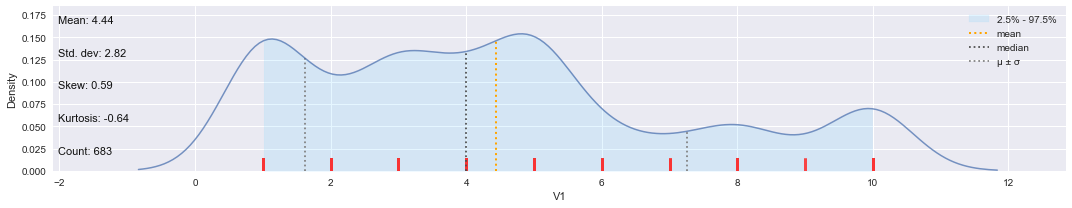

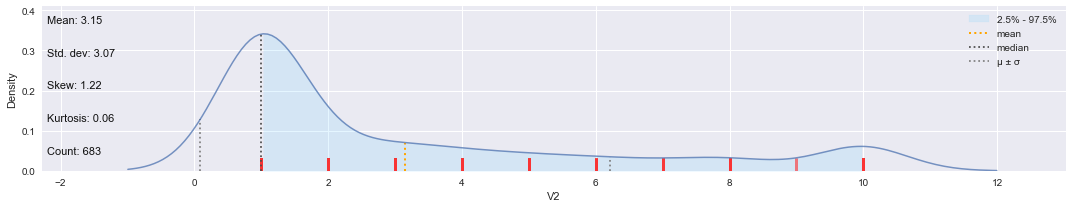

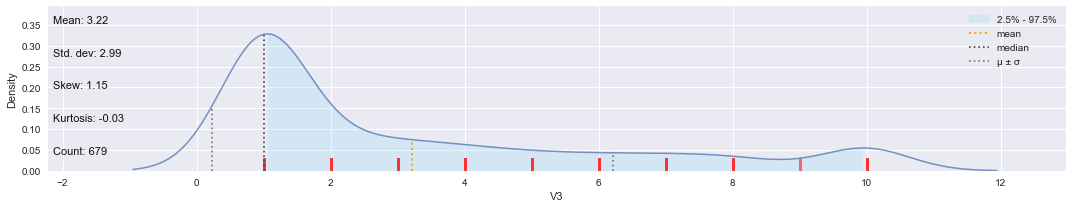

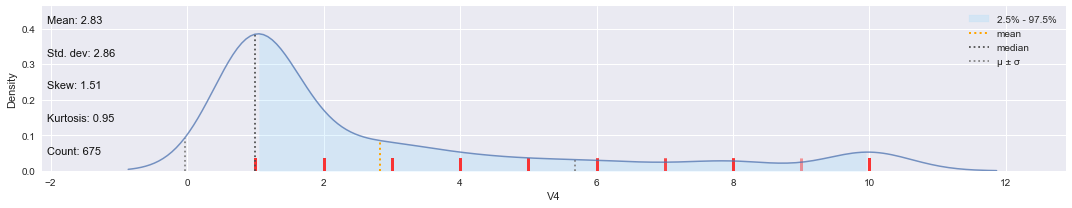

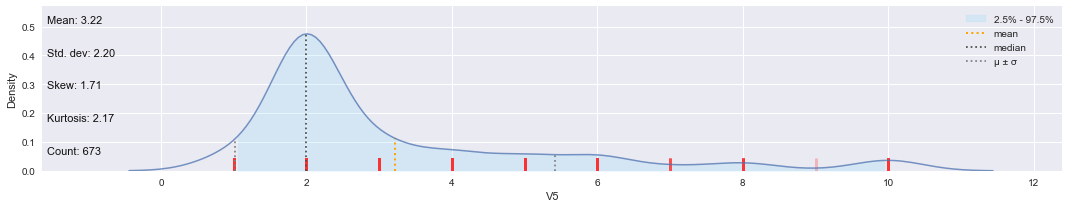

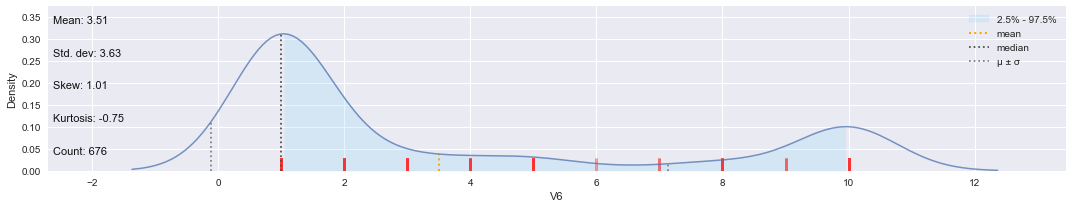

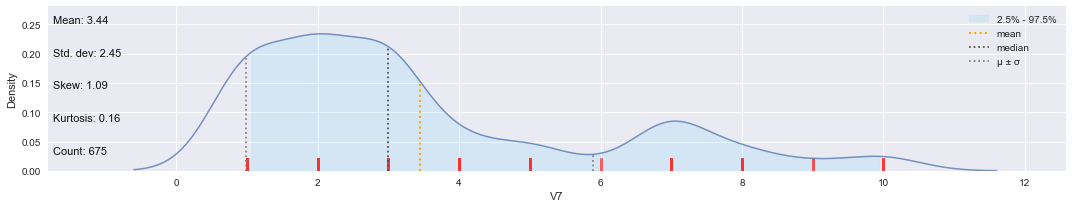

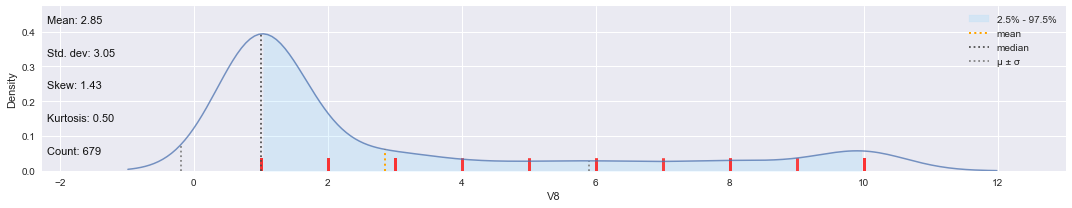

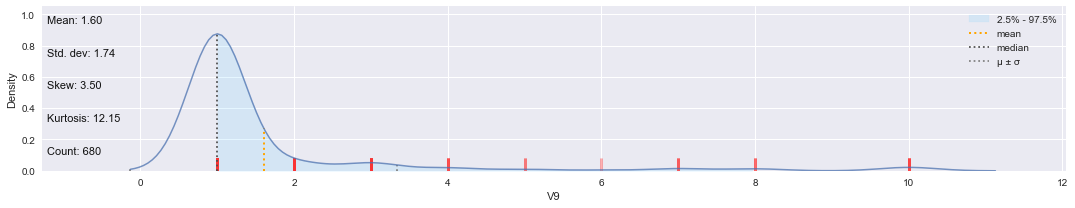

In [10]:
klib.dist_plot(df, size=3)

## **Data Preprocessing**

### Missing Value

In [11]:
df.isna().sum()

V1        0
V2        0
V3        4
V4        8
V5       10
V6        7
V7        8
V8        4
V9        3
Class     0
dtype: int64

In [12]:
# Impute menggunakan nilai median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [13]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
Class    0
dtype: int64

In [14]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0,2
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1


In [15]:
df['Class'] = df['Class'].map({
    1: 0,
    2: 1
})

In [16]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0
679,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
680,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0,1
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0


### Divide into independent and dependent variables

In [17]:
X = df.iloc[:, :-1].values
y = df['Class'].values

### Analisis Korelasi Fitur

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

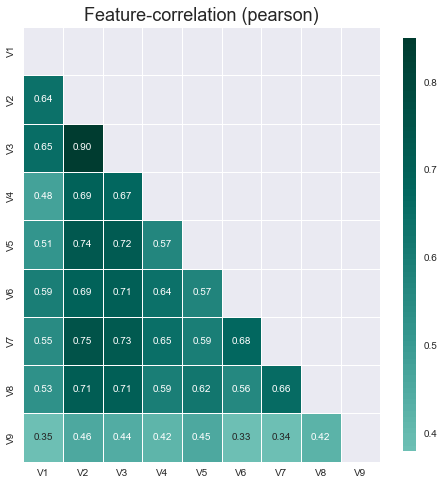

In [18]:
# Korelasi pada data yang belum dilakukan categorical encoding
klib.corr_plot(df.iloc[:,:-1], annot=True, figsize=(8,8))

### Outlier Detection

In [19]:
iso = IsolationForest(contamination=0.1)
iso_yhat = iso.fit_predict(X)

In [20]:
mask = iso_yhat != -1
X_clean, y_clean = X[mask, :], y[mask]

In [21]:
print('Shape sebelum dan sesudah pendeteksian outlier pada data X dan y\n')
print(f'X Before : {X.shape}')
print(f'X After  : {X_clean.shape}\n')
print(f'y Before : {y.shape}')
print(f'y After  : {y_clean.shape}')

Shape sebelum dan sesudah pendeteksian outlier pada data X dan y

X Before : (683, 9)
X After  : (614, 9)

y Before : (683,)
y After  : (614,)


### Train Test Split

In [22]:
# Train test split untuk data sebelum outlier detection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train test split untuk data sesudah outlier detection
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(546, 9)

In [25]:
y_train.shape

(546,)

## **Modelling - Sebelum Outlier**

### KNN

Maximum accuracy: 0.9927007299270073 at K = 10


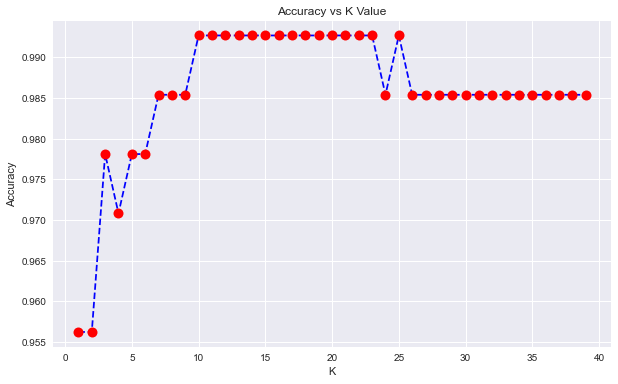

In [26]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(metrics.accuracy_score(y_test, pred_i))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print(f'Maximum accuracy: {max(accuracy_rate)} at K = {accuracy_rate.index(max(accuracy_rate)) + 1}')

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [28]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9927007299270073


### Naive Bayes

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [30]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9708029197080292


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [33]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9854014598540146


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(random_state=42, n_estimators=5)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [36]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9927007299270073


## **Modelling - Setelah Outlier**

### KNN

Maximum accuracy: 0.975609756097561 at K = 3


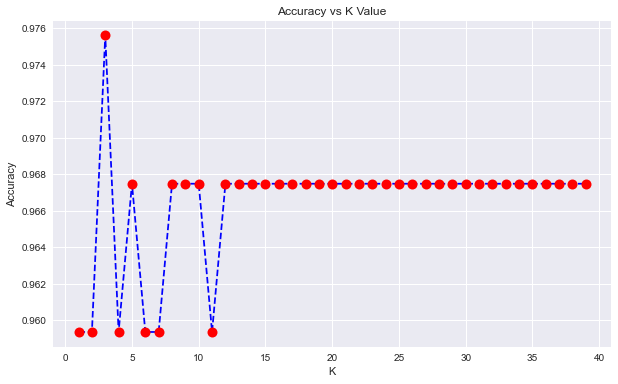

In [37]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_clean, y_train_clean)
    pred_i = knn.predict(X_test_clean)
    accuracy_rate.append(metrics.accuracy_score(y_test_clean, pred_i))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), accuracy_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print(f'Maximum accuracy: {max(accuracy_rate)} at K = {accuracy_rate.index(max(accuracy_rate)) + 1}')

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clean, y_train_clean)
y_pred_clean = knn.predict(X_test_clean)

In [39]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test_clean, y_pred_clean)}')

Accuracy of model is 0.967479674796748


### Naive Bayes

In [40]:
nb = GaussianNB()
nb.fit(X_train_clean, y_train_clean)
y_pred_clean = nb.predict(X_test_clean)

In [41]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test_clean, y_pred_clean)}')

Accuracy of model is 0.959349593495935


### Logistic Regression

In [42]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train_clean, y_train_clean)
y_pred_clean = logreg.predict(X_test_clean)

In [43]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test_clean, y_pred_clean)}')

Accuracy of model is 0.967479674796748


### Random Forest

In [44]:
rf = RandomForestClassifier(random_state=42, n_estimators=8)
rf = rf.fit(X_train_clean, y_train_clean)
y_pred_clean = rf.predict(X_test_clean)

In [45]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test_clean, y_pred_clean)}')

Accuracy of model is 0.975609756097561


## **Discussion**

Dari hasil test di atas, akurasi tertinggi berada di Random Forest dan KNN tanpa Menghilangkan outlier dengan akurasi 0.9927007299270073. Pada bagian ini akan dijabarkan nilai Precision, Recall, Classification Report, dan Confusion Matrix

### KNN - Tanpa Outlier

In [46]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [47]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9927007299270073


In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(f'Precision = {precision_score(y_test, y_pred, average=None)}')
print(f'Recall = {recall_score(y_test, y_pred, average=None)}')

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

Precision = [1.         0.98076923]
Recall = [0.98837209 1.        ]


In [49]:
target_names = ['1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        86
           2       0.98      1.00      0.99        51

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



<AxesSubplot:>

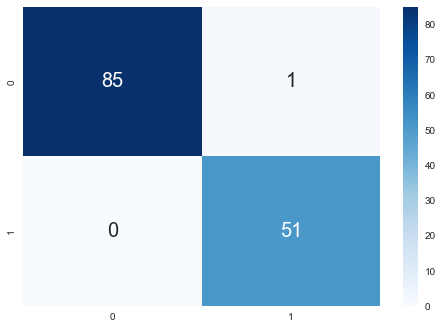

In [50]:
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={'size': 20})

### Random Forest - Tanpa Outlier

In [51]:
rf = RandomForestClassifier(random_state=42, n_estimators=5)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [52]:
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 0.9927007299270073


In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(f'Precision = {precision_score(y_test, y_pred, average=None)}')
print(f'Recall = {recall_score(y_test, y_pred, average=None)}')

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

Precision = [1.         0.98076923]
Recall = [0.98837209 1.        ]


In [54]:
target_names = ['1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        86
           2       0.98      1.00      0.99        51

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



<AxesSubplot:>

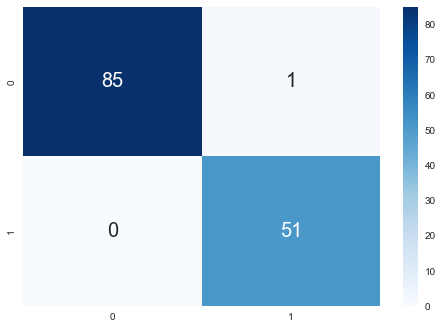

In [55]:
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={'size': 20})

## Neural Network

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
y_train

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [103]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [104]:
y_onehot = OneHotEncoder().fit(y_train).transform(y_train).toarray()
y_test_onehot = OneHotEncoder().fit(y_test).transform(y_test).toarray()

In [96]:
y_onehot

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [74]:
y_train_clean

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
y_train.shape

(546, 1)

In [99]:
model = Sequential([
    Dense(64, input_dim=9, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
model.fit(X_train, y_onehot, epochs=20)

Epoch 1/20
18/18 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7546
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8681
Epoch 3/20
18/18 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8938
Epoch 4/20
18/18 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.9249
Epoch 5/20
18/18 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.9267
Epoch 6/20
18/18 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9304
Epoch 7/20
18/18 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9451
Epoch 8/20
18/18 [==============================] - 0s 942us/step - loss: 0.1964 - accuracy: 0.9469
Epoch 9/20
18/18 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9560
Epoch 10/20
18/18 [==============================] - 0s 883us/step - loss: 0.1637 - accuracy: 0.9579
Epoch 11/20
18/

In [105]:
model.evaluate(X_test, y_test_onehot)

5/5 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9708


[0.11902579665184021, 0.970802903175354]